In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
import torch
from net import FingeralphabetNet
from preprocess import get_input
import os
import random

In [4]:
nn = FingeralphabetNet()
nn.load_state_dict(torch.load('Nets/100epochs/100'))
"""
This FingeralphabetNet trained all images of the '../genletts_py/new_data' 100 times
"""

"\nThis FingeralphabetNet trained all images of the '../genletts_py/new_data' 100 times\n"

In [3]:
def letterbw(arr, count=1):
    """
    returns the top count letters of an output of the net
    """
    maxes = [0 for i in range(count)]
    indexes = [0 for i in range(count)]

    for i, x in enumerate(arr):
        if x > min(maxes):
            indexes[maxes.index(min(maxes))] = i
            maxes[maxes.index(min(maxes))] = x
    
    abc = [chr(i) for i in range(ord("A"), ord("Z")+1)] + ["SPACE"]
    return [abc[i] for i in indexes], maxes

In [6]:
acc = 0
for fn in os.listdir('../genLetts_py/new_test'):
    if fn == '.DS_Store':
        continue
    img = get_input('../genLetts_py/new_test/' + fn)
    guess = letter(nn(img.unsqueeze(0).unsqueeze(0))[0])
    #print('guess:', *[guess[0][i] + ': ' + str(guess[1][i].item()) for i in range(len(guess[0]))])
    acc += int(guess[0][0] == fn[0] or guess[0][0] == fn[:5])
num = len(os.listdir('../genLetts_py/new_test'))
print(acc, 'correct out of', num, 'tries!', 'Accuracy:', str(acc/num*100) + '%')

FileNotFoundError: [Errno 2] No such file or directory: '../genLetts_py/new_test'

In [7]:
plt.rcParams['figure.figsize'][0], plt.rcParams['figure.figsize'][1] = [12, 6]

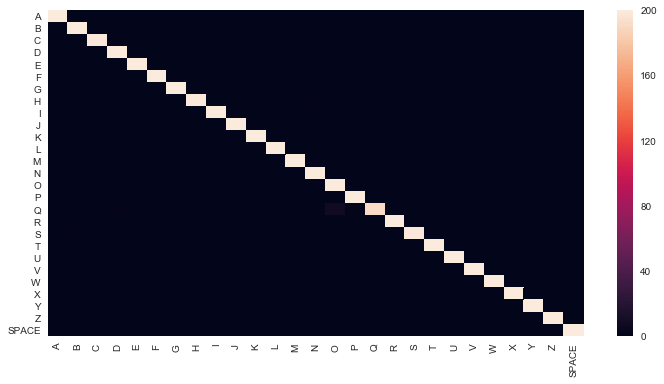

In [7]:
abc = [chr(i) for i in range(ord("A"), ord("Z")+1)] + ["SPACE"]
total_data = pd.DataFrame(0, columns=abc, index=abc)
for fn in os.listdir('../genLetts_py/new_test'):
    if fn == '.DS_Store':
        continue
    img = get_input('../genLetts_py/new_test/' + fn)
    guess = letterbw(nn(img.unsqueeze(0).unsqueeze(0))[0])[0][0]
    true = fn[0] if fn[:5] != 'SPACE' else 'SPACE'
    total_data.at[true, guess] = total_data.at[true, guess] + 1
sns.heatmap(total_data)

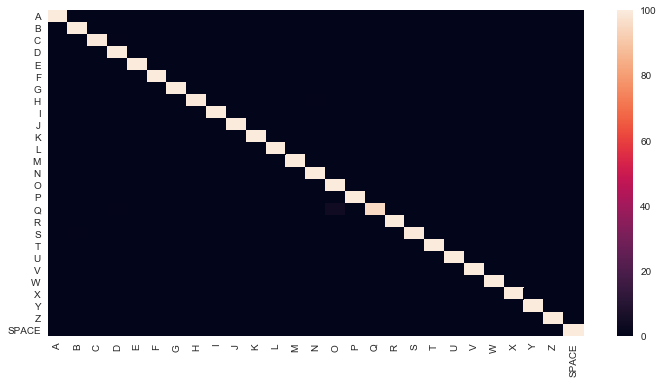

In [8]:
perc_data = total_data.copy()
for ind in perc_data.index:
    perc_data.loc[ind] = perc_data.loc[ind] / perc_data.loc[ind].sum() * 100
sns.heatmap(perc_data)

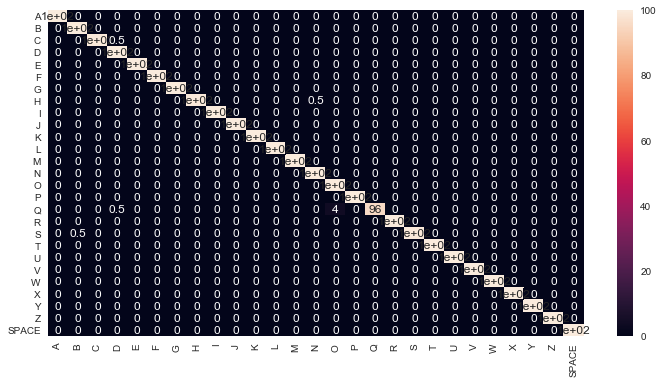

In [9]:
sns.heatmap(perc_data, annot=True)

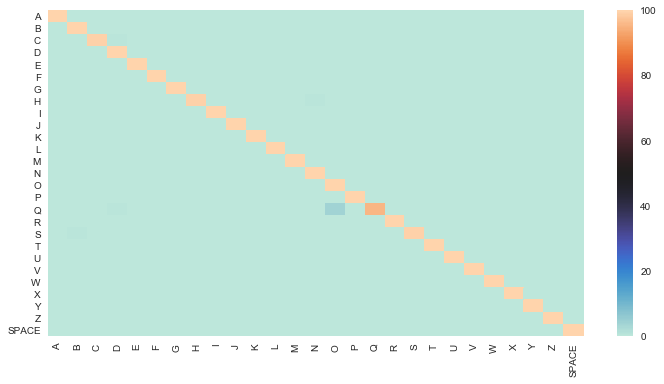

In [10]:
sns.heatmap(perc_data, center=50)

In [11]:
def heatmapbw(path, *args, print_acc=False, **kwargs):
    nn = FingeralphabetNet()
    nn.load_state_dict(torch.load(path))
    
    abc = [chr(i) for i in range(ord("A"), ord("Z")+1)] + ["SPACE"]
    total_data = pd.DataFrame(0, columns=abc, index=abc)
    acc = 0
    for fn in os.listdir('../genLetts_py/new_test'):
        if fn == '.DS_Store':
            continue
        img = get_input('../genLetts_py/new_test/' + fn)
        guess = letterbw(nn(img.unsqueeze(0).unsqueeze(0))[0])[0][0]
        true = fn[0] if fn[:5] != 'SPACE' else 'SPACE'
        total_data.at[true, guess] = total_data.at[true, guess] + 1
        acc += int(guess[0][0] == fn[0] or guess[0][0] == fn[:5])
        
    num = len(os.listdir('../genLetts_py/new_test'))
    if print_acc:
        print(acc, 'correct out of', num, 'tries!', 'Accuracy:', str(acc/num*100) + '%')
    
    perc_data = total_data.copy()
    for ind in perc_data.index:
        perc_data.loc[ind] = perc_data.loc[ind] / perc_data.loc[ind].sum() * 100
    
    sns.heatmap(perc_data, center=50) 
    plt.ylabel("True")
    plt.xlabel("Guess")
    
    return acc/num, perc_data

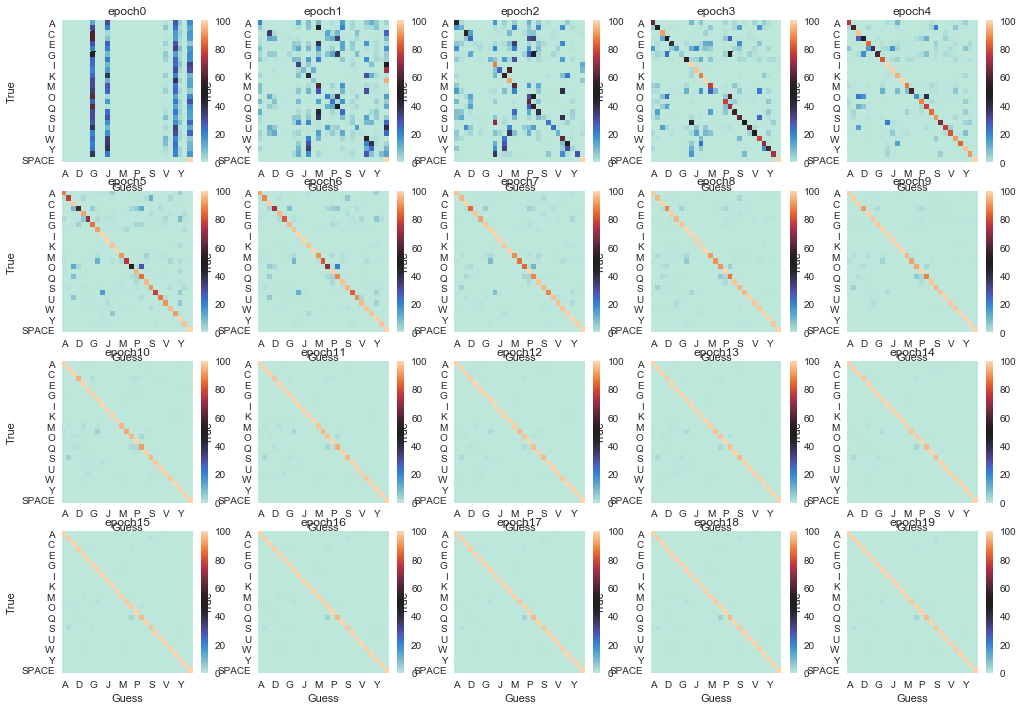

In [14]:
plt.rcParams['figure.figsize'][0], plt.rcParams['figure.figsize'][1] = [17, 12]
for i in range(20):
    #print(i)
    plt.subplot(4, 5, i+1)
    plt.title("epoch" + str(i))
    heatmapbw('Nets/100epochs/' + str(i))
    

In [8]:
fn = 'C0.jpg'
nn = FingeralphabetNet()
#nn.load_state_dict(torch.load("Nets/100epochs/100"))
img = get_input('../dataset/' + fn)
print(img.shape)
guess = letterfa(nn(img.unsqueeze(0))[0])[0][0]
true = fn[0]

torch.Size([3, 240, 320])
torch.Size([1, 6, 104, 148])
torch.Size([1, 16, 36, 62])
torch.Size([1, 35712])
torch.Size([1, 1200])
torch.Size([1, 150])
torch.Size([1, 29])


In [7]:
def letterfa(arr, count=1):
    """
    returns the top count letters of an output of the net
    """
    maxes = [0 for i in range(count)]
    indexes = [0 for i in range(count)]

    for i, x in enumerate(arr):
        if x > min(maxes):
            indexes[maxes.index(min(maxes))] = i
            maxes[maxes.index(min(maxes))] = x
    
    abc = [chr(i) for i in range(ord("A"), ord("Z")+1)] + ["SCH", "CH", "NOTHING"] 
    return [abc[i] for i in indexes], maxes

In [13]:
nn = FingeralphabetNet()
nn.load_state_dict(torch.load('Nets/100epochs/0/1'))
acc = 0
for i, fn in enumerate(os.listdir('../dataset/test/')):
    if i == 1000:
        break
    if fn == '.DS_Store':
        continue
    img = get_input('../dataset/test/' + fn)
    guess = letterfa(nn(img.unsqueeze(0))[0])
    #print('guess:', *[guess[0][i] + ': ' + str(guess[1][i].item()) for i in range(len(guess[0]))])
    if fn[1].isdigit():
        acc += int(guess[0][0] == fn[0])
    else:
        acc += int(guess[0][0] == fn[:2] or guess[0][0] == fn[:3] or guess[0][0] == fn[:7])
print(acc, 'correct out of', 1000, 'tries!', 'Accuracy:', str(acc/1000*100) + '%')

32 correct out of 1000 tries! Accuracy: 3.2%


In [14]:
nn = FingeralphabetNet()
nn(get_input('../dataset/test/NOTHING2700.jpg').unsqueeze(0))

tensor(1.00000e-02 *
       [[ 2.0023,  2.3168,  4.1607, -6.1026, -4.9424,  3.2512, -4.4364,
          2.0641, -6.5344, -2.0485, -5.4560,  1.5315, -0.9722, -0.7505,
         -7.0373,  4.2800, -0.3671, -2.3648, -4.6246,  1.7869, -0.7835,
          1.0036, -8.4138, -7.9125, -1.2518, -1.8513, -0.1596,  5.1575,
         -7.2057]])